In [1]:
from sentence_transformers import SentenceTransformer,util
# model=SentenceTransformer('all-MiniLM-L6-v2')
model=SentenceTransformer('msmarco-distilbert-base-v3')

In [2]:
import json
with open("./data/python_org_docs.json", 'r',encoding='utf-8') as file:
    data = json.load(file)
for entry in data[1:5]:
    print(entry['title'])

Python Module Index — Python 3.12.2 documentation
3.11.8 Documentation
3.13.0a4 Documentation
3.10.13 Documentation


In [3]:
sentences=data[1:5]
embeddings=model.encode(sentences)

for sentence,embedding in zip(sentences,embeddings):
    print(sentence,embedding,"\n\n")
dataset_emb=model.encode(data)  

{'title': 'Python Module Index — Python 3.12.2 documentation', 'h1': ['Python Module Index'], 'h2': [], 'strong': ['_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'z', '_', 'a', 'Deprecated:', 'Deprecated:', 'b', 'c', 'Deprecated:', 'Deprecated:', 'Deprecated:', 'Deprecated:', 'd', 'e', 'f', 'g', 'h', 'i', 'Deprecated:', 'j', 'k', 'l', 'm', 'Deprecated:', 'Deprecated:', 'n', 'Deprecated:', 'Deprecated:', 'o', 'Deprecated:', 'Deprecated:', 'p', 'Deprecated:', 'q', 'r', 's', 'Deprecated:', 'Deprecated:', 'Deprecated:', 't', 'Deprecated:', 'u', 'Deprecated:', 'v', 'w', 'x', 'Deprecated:', 'z'], 'link': 'https://docs.python.org/3/py-modindex.html'} [ 3.29348683e-01  1.67865366e-01  3.67250711e-01  3.85667920e-01
  8.72851983e-02 -1.68060407e-01 -3.42311591e-01 -7.57749021e-01
 -1.01626627e-01  5.38171828e-01  6.70367554e-02 -2.25038622e-02
  1.60235971e-01 -3.94502342e-01  5.04704356e-01 -3.44067872e-01
 -1.334760

In [4]:
print(embeddings)


[[ 0.32934868  0.16786537  0.3672507  ... -0.06083777  0.09922422
  -0.22679564]
 [ 0.2448023   0.6164287   0.49160933 ...  0.40818992  0.4330964
   0.32414556]
 [-0.16424428  0.6973521   0.5317832  ...  0.2525622   0.32120252
   0.15627302]
 [ 0.4140929   0.7230336  -0.10881212 ...  0.5393398   0.5005032
   0.00805436]]


In [5]:
emb1=model.encode("python tkinter")
emb2=model.encode("learn tuple")
cos_sim=util.cos_sim(emb2,embeddings)
cos_sim
import torch
def search(query,dataset):
    query_emb=model.encode(query)
    # dataset_emb=model.encode(dataset)
    cos_sim=util.cos_sim(query_emb,dataset_emb)
    max_value1, index1 = torch.max(cos_sim, dim=1)
    max_value, indexs = torch.topk(cos_sim, k=3, largest=True)
    # print(model.decode(max_value1))

    print(max_value,indexs)
    indexs=indexs.tolist()[0]
    for index in indexs:
        print(max_value,"\t",data[index])

query__="connect client with server"
search(query__,dataset_emb)


tensor([[0.4560, 0.4560, 0.4531]]) tensor([[ 422, 3496, 3273]])
tensor([[0.4560, 0.4560, 0.4531]]) 	 {'title': 'http.client — HTTP protocol client — Python 3.12.2 documentation', 'h1': ['http.client', ' — HTTP protocol client', '¶'], 'h2': ['HTTPConnection Objects', '¶', 'HTTPResponse Objects', '¶', 'Examples', '¶', 'HTTPMessage Objects', '¶'], 'strong': ['Source code:', 'RFC 2822', 'RFC 2616 §5.1.2', 'Host header', 'RFC 2616 §5.1.2', 'RFC 822', 'RFC 7230'], 'link': 'https://docs.python.org/3.12/library/http.client.html'}
tensor([[0.4560, 0.4560, 0.4531]]) 	 {'title': 'http.client — HTTP protocol client — Python 3.12.2 documentation', 'h1': ['http.client', ' — HTTP protocol client', '¶'], 'h2': ['HTTPConnection Objects', '¶', 'HTTPResponse Objects', '¶', 'Examples', '¶', 'HTTPMessage Objects', '¶'], 'strong': ['Source code:', 'RFC 2822', 'RFC 2616 §5.1.2', 'Host header', 'RFC 2616 §5.1.2', 'RFC 822', 'RFC 7230'], 'link': 'https://docs.python.org/3/library/http.client.html'}
tensor([[0.

In [6]:
# import os
# import json

# directory_path = './data'  # Replace with the path to your directory

# # List all files in the directory
# files = os.listdir(directory_path)

# # Iterate through each file in the directory
# for file_name in files:
#     # Construct the full file path
#     file_path = os.path.join(directory_path, file_name)

#     # Check if the file is a JSON file
#     if file_name.endswith('.json'):
#         with open(file_path, 'r',encoding='utf-8') as json_file:
#             # Load JSON data from the file
#             data = json.load(json_file)

#             # Process the data as needed
#             print(f"Data from {file_name}: {data}")
#         # print(file_name)

In [7]:
len(dataset_emb)
qna=SentenceTransformer('clips/mfaq')

c:\Users\Tamal Mallick\Documents\6th sem college work\Networking\Project_search_engine\search_engine\Lib\site-packages\transformers\configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [8]:
qna_data=qna.encode(data)

In [9]:
qna_res=util.semantic_search(qna.encode(query__),qna_data)

In [10]:
for result in qna_res[0]:
    corpus_id = result['corpus_id']
    print(result,data[corpus_id])
# qna_res[0][0]['corpus_id']

{'corpus_id': 2882, 'score': 0.9794424772262573} {'title': '网络和进程间通信 — Python 3.12.2 文档', 'h1': ['网络和进程间通信', '¶'], 'h2': [], 'strong': [], 'link': 'https://docs.python.org/zh-cn/3/library/ipc.html'}
{'corpus_id': 1726, 'score': 0.9777097702026367} {'title': 'http.client — Client pour le protocole HTTP — Documentation Python 3.12.2', 'h1': ['http.client', ' — Client pour le protocole HTTP', '¶'], 'h2': ['Les objets HTTPConnection', '¶', 'Les objets HTTPResponse', '¶', 'Exemples', '¶', 'Les objets HTTPMessage', '¶'], 'strong': ['Code source :', 'RFC 2822', 'RFC 2616 §5.1.2', 'Host header', 'RFC 2616 §5.1.2', 'RFC 822', 'RFC 7230'], 'link': 'https://docs.python.org/fr/3/library/http.client.html'}
{'corpus_id': 686, 'score': 0.9773679375648499} {'title': 'Call Protocol — Python 3.12.2 documentation', 'h1': ['Call Protocol', '¶'], 'h2': ['The ', 'tp_call', ' Protocol', '¶', 'The Vectorcall Protocol', '¶', 'Object Calling API', '¶', 'Call Support API', '¶'], 'strong': ['PEP 590', 'must'], 'l

In [11]:
from transformers import pipeline

In [12]:
qa_pip=pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
import numpy as np
qa_pip("who is wife of arya ?","arya married to barshan's bon shreya")

{'score': 0.7983735203742981,
 'start': 16,
 'end': 36,
 'answer': "barshan's bon shreya"}

In [14]:
corpus=[
    "raj is a good boy",
    "sreya is a bad girl",
    "barshan play footbal",
    "i paly socker",
    "subhra play violin",
    "barshan play guiter",
    "sangbed has a horse",
    "unicorn is a magical horse",
    "fuck you pakistan"
]
corpus_embedding=model.encode(corpus)
corpus_embedding=corpus_embedding/np.linalg.norm(corpus_embedding,axis=1,keepdims=True)
corpus_embedding


array([[-0.03063757, -0.02059705,  0.04009358, ...,  0.08463044,
         0.0865507 , -0.02077119],
       [-0.03355576, -0.02124588,  0.01988487, ...,  0.02359992,
        -0.0266854 ,  0.01154326],
       [ 0.0410148 ,  0.03613842, -0.06398603, ...,  0.00993588,
         0.0133508 , -0.09588113],
       ...,
       [-0.04627474, -0.04071463, -0.05478615, ...,  0.01938844,
         0.0050359 , -0.05114226],
       [-0.06200739, -0.02187051, -0.06301035, ..., -0.0285805 ,
        -0.03588829, -0.03642893],
       [ 0.02848884, -0.02057645,  0.00674166, ..., -0.03339275,
         0.01499382, -0.05729996]], dtype=float32)

Elbow Method - Inertias:
[6.910338401794434, 5.903779983520508, 4.671365737915039, 3.5300705432891846, 2.7333409786224365, 1.8794090747833252, 0.9297371506690979, 0.3282269835472107, 0.0]


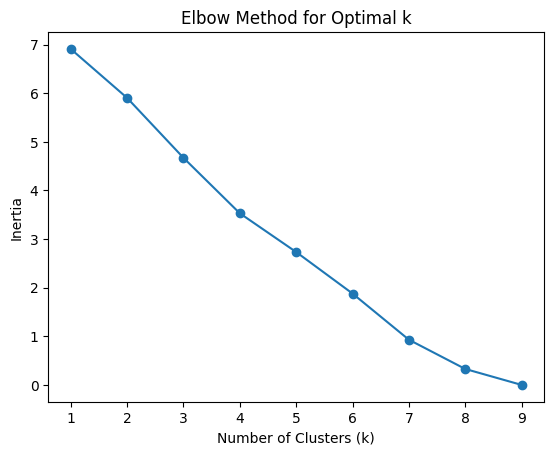

In [15]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'corpus_embedding' is your normalized feature matrix
k_range = range(1, len(corpus_embedding) + 1)  # Adjust the range based on the number of samples

# Elbow Method
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(corpus_embedding)
    inertias.append(kmeans.inertia_)

print("Elbow Method - Inertias:")
print(inertias)

# Plotting the Elbow Method results
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [16]:
clustering_model=KMeans(n_clusters=4)
clustering_model.fit(corpus_embedding)
clustering_assignment=clustering_model.labels_
print(clustering_assignment)

[0 0 0 1 3 0 2 2 1]


In [17]:
clustered_sentences={}
for sid,cid in enumerate(clustering_assignment):
    if cid not in clustered_sentences:
        clustered_sentences[cid]=[]
    clustered_sentences[cid].append(corpus[sid])
clustered_sentences

{0: ['raj is a good boy',
  'sreya is a bad girl',
  'barshan play footbal',
  'barshan play guiter'],
 1: ['i paly socker', 'fuck you pakistan'],
 3: ['subhra play violin'],
 2: ['sangbed has a horse', 'unicorn is a magical horse']}